Loading ML libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report,confusion_matrix, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Big_Data_Assignment/Scholastic Travel Company

/content/drive/MyDrive/Big_Data_Assignment/Scholastic Travel Company


Loading the dataset

In [82]:
df = pd.read_excel('/content/drive/MyDrive/Big_Data_Assignment/Scholastic Travel Company/Practice Scholastic Travel.xlsx')

In [5]:
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1.0,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2.0,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3.0,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4.0,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5.0,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


Cleaning Data: Converting incorrect data types

In [6]:
#Summary of the dataframe
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2389 non-null   float64       
 1   Program.Code                    2389 non-null   object        
 2   From.Grade                      2262 non-null   float64       
 3   To.Grade                        2239 non-null   float64       
 4   Group.State                     2389 non-null   object        
 5   Is.Non.Annual.                  2389 non-null   float64       
 6   Days                            2389 non-null   float64       
 7   Travel.Type                     2389 non-null   object        
 8   Departure.Date                  2389 non-null   datetime64[ns]
 9   Return.Date                     2389 non-null   datetime64[ns]
 10  Deposit.Date                    2389 non-null   datetime64[ns]
 11  Spec

ID                                       float64
Program.Code                              object
From.Grade                               float64
To.Grade                                 float64
Group.State                               object
Is.Non.Annual.                           float64
Days                                     float64
Travel.Type                               object
Departure.Date                    datetime64[ns]
Return.Date                       datetime64[ns]
Deposit.Date                      datetime64[ns]
Special.Pay                               object
Tuition                                  float64
FRP.Active                               float64
FRP.Cancelled                            float64
FRP.Take.up.percent.                     float64
Early.RPL                         datetime64[ns]
Latest.RPL                        datetime64[ns]
Cancelled.Pax                            float64
Total.Discount.Pax                       float64
Initial.System.Date 

In [83]:
df = df.rename(columns={"Retained.in.2012.":"Retained_in_2012"})

In [84]:
#Converting datatypes that should be categorical into "category"
df['Program.Code'] = df['Program.Code'].astype('category')
df['From.Grade'] = df['From.Grade'].astype('category')
df['To.Grade'] = df['To.Grade'].astype('category')
df['Is.Non.Annual.'] = df['Is.Non.Annual.'].astype('category')
df['Parent.Meeting.Flag'] = df['Parent.Meeting.Flag'].astype('category')
df['CRM.Segment'] = df['CRM.Segment'].astype('category')
df['MDR.High.Grade'] = df['MDR.High.Grade'].astype('category')
df['School.Sponsor'] = df['School.Sponsor'].astype('category')
df['SingleGradeTripFlag'] = df['SingleGradeTripFlag'].astype('category')
df['Program.Code'] = df['Program.Code'].astype('category')
df['Group.State'] = df['Group.State'].astype('category')
df['Travel.Type'] = df['Travel.Type'].astype('category')
df['Special.Pay'] = df['Special.Pay'].astype('category')
df['Poverty.Code'] = df['Poverty.Code'].astype('category')
df['Region'] = df['Region'].astype('category')
df['School.Type'] = df['School.Type'].astype('category')
df['MDR.Low.Grade'] = df['MDR.Low.Grade'].astype('category')
df['Income.Level'] = df['Income.Level'].astype('category')
df['SPR.Product.Type'] = df['SPR.Product.Type'].astype('category')
df['SPR.New.Existing'] = df['SPR.New.Existing'].astype('category')
df['SchoolGradeTypeLow'] = df['SchoolGradeTypeLow'].astype('category')
df['SchoolGradeTypeHigh'] = df['SchoolGradeTypeHigh'].astype('category')
df['SchoolGradeType'] = df['SchoolGradeType'].astype('category')
df['DepartureMonth'] = df['DepartureMonth'].astype('category')
df['GroupGradeTypeLow'] = df['GroupGradeTypeLow'].astype('category')
df['GroupGradeTypeHigh'] = df['GroupGradeTypeHigh'].astype('category')
df['GroupGradeType'] = df['GroupGradeType'].astype('category')
df['MajorProgramCode'] = df['MajorProgramCode'].astype('category')
df['SchoolSizeIndicator'] = df['SchoolSizeIndicator'].astype('category')
df['Retained_in_2012'] = df['Retained_in_2012'].astype('category')


In [ ]:
df.head()

In [ ]:
#Checking null values
pd.DataFrame(df).isna().sum()

In [85]:
#Dropping columns where missing data is more and date variable as it is redundant
df1 = df.drop(columns=['ID','Special.Pay','Early.RPL','Latest.RPL','FirstMeeting','LastMeeting','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Program.Code                 2389 non-null   category      
 1   From.Grade                   2262 non-null   category      
 2   To.Grade                     2239 non-null   category      
 3   Group.State                  2389 non-null   category      
 4   Is.Non.Annual.               2389 non-null   category      
 5   Days                         2389 non-null   float64       
 6   Travel.Type                  2389 non-null   category      
 7   Departure.Date               2389 non-null   datetime64[ns]
 8   Return.Date                  2389 non-null   datetime64[ns]
 9   Deposit.Date                 2389 non-null   datetime64[ns]
 10  Tuition                      2389 non-null   float64       
 11  FRP.Active                   2389 non-null 

Replacing NA values with median for numerical varaibles

In [86]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df1.select_dtypes(include=['int64','float64']))
df1[df1.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df1.select_dtypes(include=['int64','float64']))

In [13]:
pd.DataFrame(df1['Poverty.Code']).isna().sum()

Poverty.Code    599
dtype: int64

In [144]:
df2=df1
df2.head()

,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,Deposit.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained_in_2012
0,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,2010-08-30,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,2009-11-15,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,2010-10-15,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,2011-01-07,...,Undefined,Undefined,Undefined->Undefined,H,0.0,0.045256,1.000000,0.0,NaN,0.0
4,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,2010-09-30,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0


In [ ]:
df2.info()

In [145]:
#Dropping character columns
df2 = df2.drop(columns=["Program.Code","Travel.Type","Poverty.Code","Group.State","SchoolGradeType","GroupGradeType","Region","School.Type","MDR.Low.Grade","MDR.High.Grade",
"Income.Level","SPR.Product.Type","SPR.New.Existing","SchoolGradeTypeLow","SchoolGradeTypeHigh","DepartureMonth","GroupGradeTypeLow",
"GroupGradeTypeHigh","SchoolSizeIndicator","MajorProgramCode","Departure.Date","Return.Date","Deposit.Date","Initial.System.Date"])

In [ ]:
df2.dtypes

In [146]:
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df2.select_dtypes(exclude=['int64','float64']))
df2[df2.select_dtypes(exclude=['int64','float64']).columns] = imputer.transform(df2.select_dtypes(exclude=['int64','float64']))

Decision Tree Classifier

In [ ]:
df2.head(n= 30)

In [147]:
#Defining the vector of target(y) and matrix of features(X)
y = df2['Retained_in_2012']
X = df2.drop(columns = 'Retained_in_2012')

Setting seed and splitting the data 70% training and 30% testing

In [148]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1672, 23)
X_test : (717, 23)
y_train : (1672,)
y_test : (717,)


In [149]:
classifier_DT = DecisionTreeClassifier(random_state=1234)
#Train the model classifier on training data
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [150]:
#model for predicting values for training and testing data
y_train_pred = classifier_DT.predict(X_train)
y_test_pred = classifier_DT.predict(X_test)
# accuracy score
from sklearn.metrics import accuracy_score
training_score= accuracy_score(y_train,y_train_pred )
test_score= accuracy_score(y_test,y_test_pred )

In [151]:
#Training accuracy score
# 100 percent accuracy means overfitting
print("training_score:" , training_score)
# Testing accuracy score
print("testing_score:" ,test_score)

training_score: 1.0
testing_score: 0.6959553695955369


Confusion matrix for training data
Confusion matrix for testing data


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


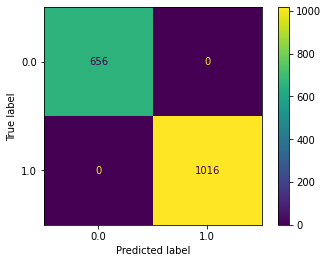

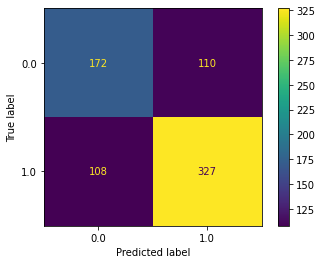

In [152]:
#Plotting the confusion matrix for both training and testing data
from sklearn.metrics import plot_confusion_matrix
print("Confusion matrix for training data")
plot_confusion_matrix(classifier_DT, X_train, y_train) 
#For testing data
print("Confusion matrix for testing data")
plot_confusion_matrix(classifier_DT, X_test, y_test)

Optimizing Decision Tree Performance using pre-pruning


In [153]:
# Create Decision Tree classifer object
optimize_clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
optimize_clf = optimize_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = optimize_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7740585774058577


Random Forest

In [154]:
#Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)


After training, check the accuracy using actual and predicted values.

In [155]:
# Model Accuracy, how often is the classifier correct?
# metrics module is used for accuracy calculation
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.7656903765690377


Finding Important Features: Creating random forest models with Gini impurity

In [156]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestClassifier(max_features='sqrt', n_jobs=1)

Using the feature importance variable to see feature importance scores.


In [157]:
import pandas as pd
feature_imp = pd.Series(rf_classifier.feature_importances_,index=X.columns.values).sort_values(ascending=False)
feature_imp

SingleGradeTripFlag            0.098583
Is.Non.Annual.                 0.079558
Total.Pax                      0.067295
Total.School.Enrollment        0.064065
FPP.to.School.enrollment       0.061059
FRP.Active                     0.059173
FPP                            0.056847
SPR.Group.Revenue              0.055173
Tuition                        0.054424
FRP.Take.up.percent.           0.050254
FPP.to.PAX                     0.047162
EZ.Pay.Take.Up.Rate            0.046521
From.Grade                     0.043587
Cancelled.Pax                  0.036018
FRP.Cancelled                  0.031935
To.Grade                       0.031642
CRM.Segment                    0.026869
Days                           0.022661
Num.of.Non_FPP.PAX             0.021502
Total.Discount.Pax             0.019869
NumberOfMeetingswithParents    0.013281
School.Sponsor                 0.008157
Parent.Meeting.Flag            0.004367
dtype: float64

Visualize these scores using the seaborn library.


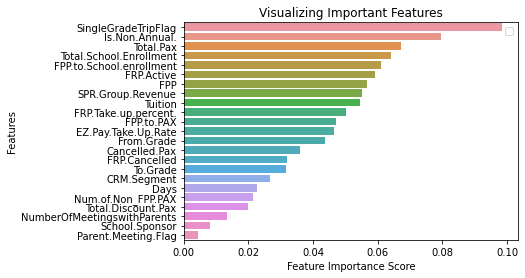

In [158]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Generating the Model on Selected Features

In [159]:
df3 = df2

Dropping columns whose feature important score is less than 0.040

In [160]:
df3 = df3.drop(columns=["Parent.Meeting.Flag","School.Sponsor","NumberOfMeetingswithParents","Days","Total.Discount.Pax","Num.of.Non_FPP.PAX",
                        "CRM.Segment","FRP.Cancelled","Cancelled.Pax"])

In [161]:
# Split dataset into features and labels
y = df3['Retained_in_2012']
X = df3.drop(columns = 'Retained_in_2012')                                  
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test


After spliting, you will generate a model on the selected training set feature.

In [162]:
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# performing predictions on the selected test set features
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, compare actual and predicted values
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7740585774058577
